In [2]:
import sys

sys.path.append("..")

from tools.tools import load_sample, preprocess_data
from tools.display_tools import plot_current_state_of_graph, fancy_plot
import pickle
import numpy as np
import matplotlib as mpl

# Graphics that we have included in our paper.

## Displaying graphs

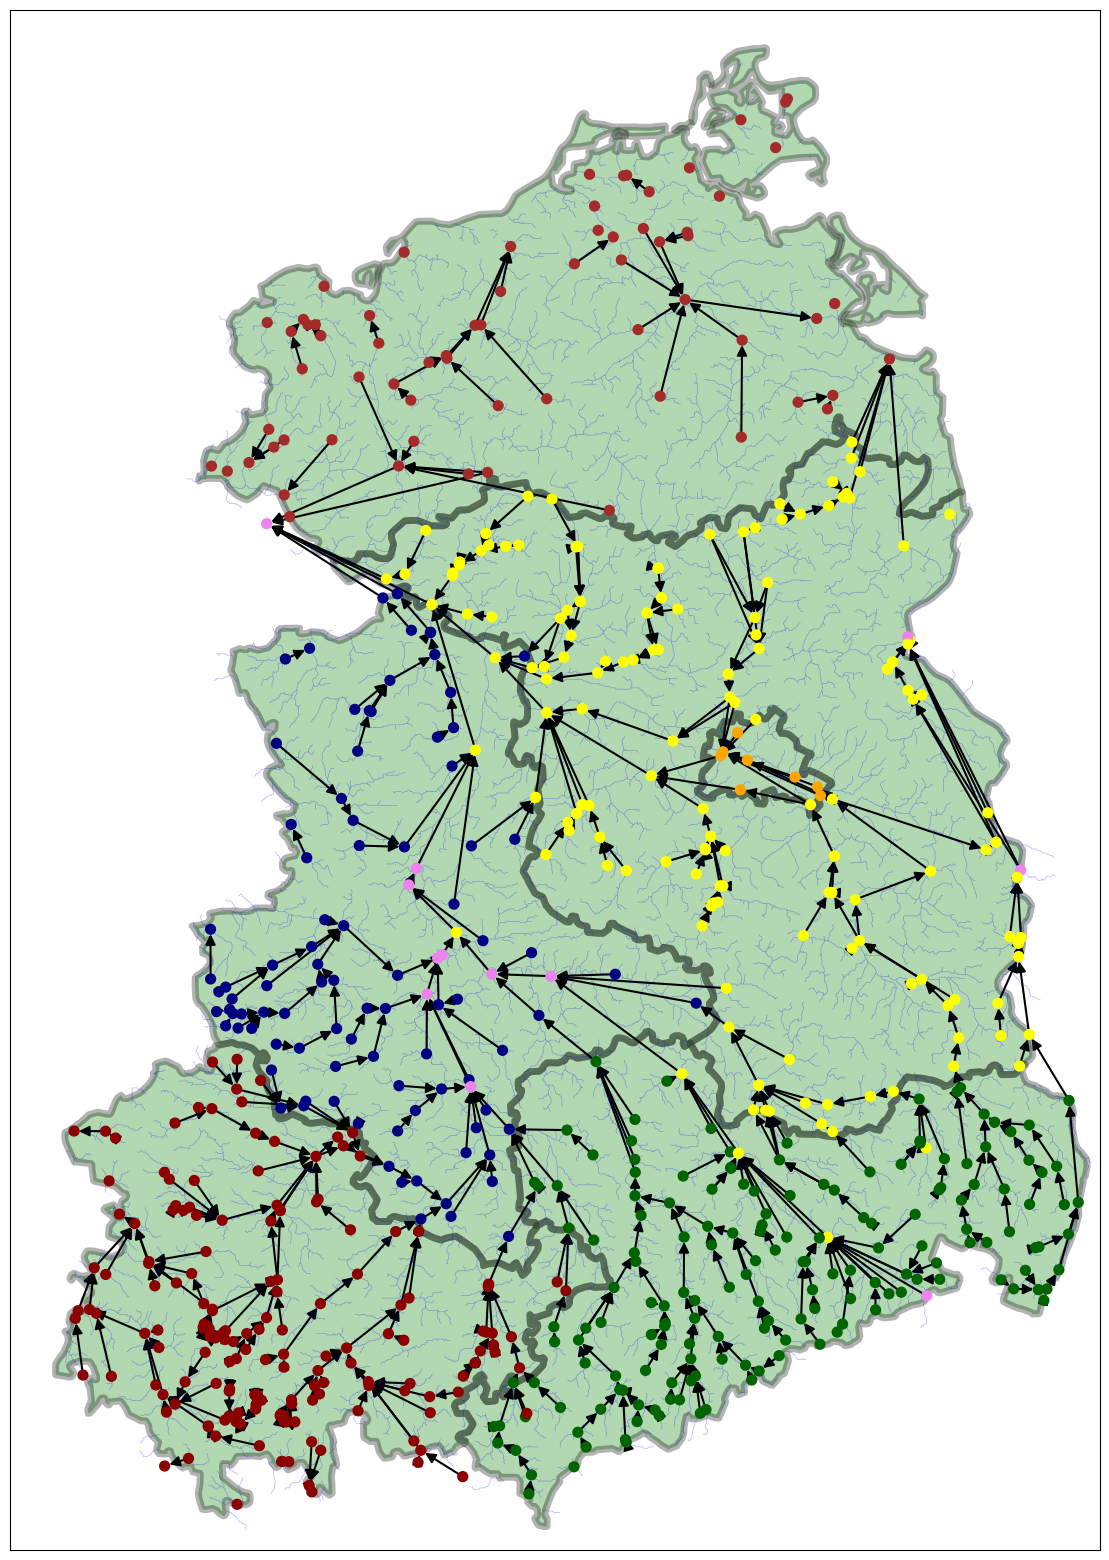

In [3]:
G_eg = pickle.load(open("../product/rivers_east_germany.p", "rb"))
plot_current_state_of_graph(
    G_eg,
    dpi=300,
    node_size=50,
    save=0, #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15, 20),
    font_size=1,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    title=""
)

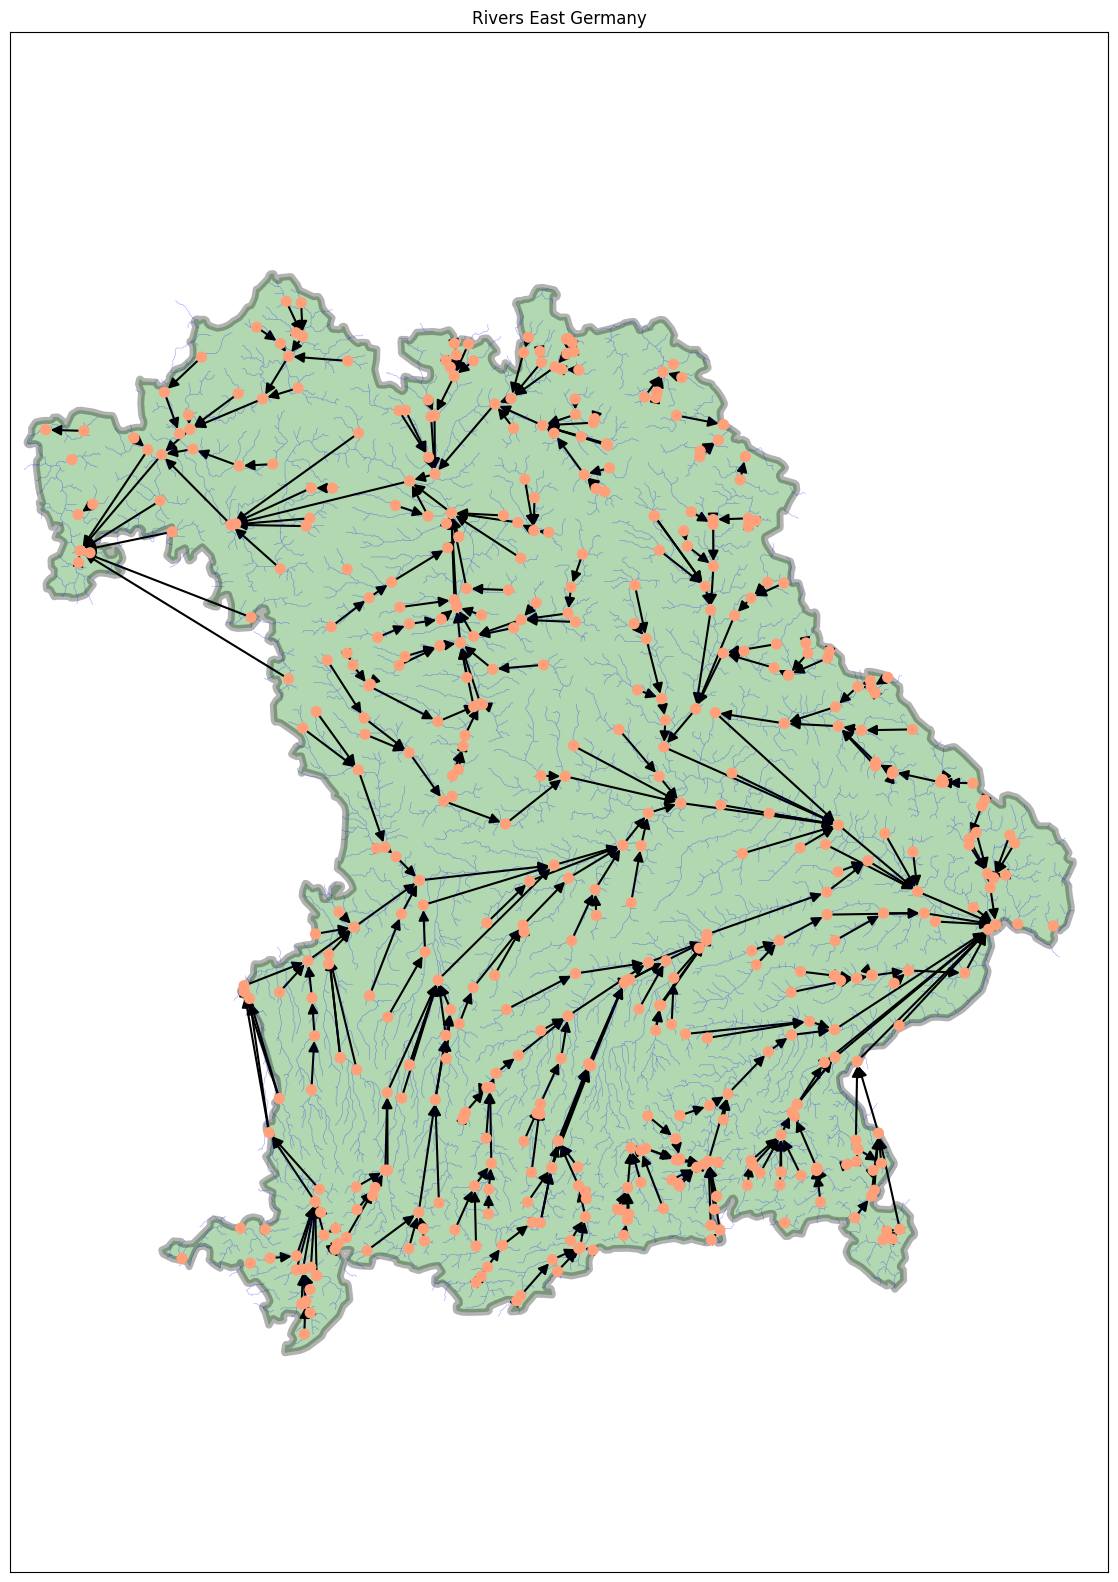

In [4]:
G_b = pickle.load(open("../product/rivers_bavaria.p", "rb"))
plot_current_state_of_graph(
    G_b,
    lim=(46.6, 51.3),
    limx=(8.9, 14.),
    dpi=300,
    node_size=50,
    save=0, # "bavaria"
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15,20),
    hardcode_colors = ["lightsalmon" for _ in range(len(G_b.nodes))],
    font_size=1,
    ger_path = "../product/visualization/bavaria/bavaria_map.shp",
    river_path = "../product/visualization/bavaria/river_bavaria_map.shp",
)

## Data example

In [5]:
# Load the raw ts data and the labels for a specific sample:
ds  =pickle.load(open("../datasets/random_3" + "/east.p", "rb"))

cmap = mpl.colormaps['viridis']
base_c = cmap(np.linspace(0, 1, 4))

example = ds[13]
data = load_sample(p= "../product/rivers_ts_east_germany.csv", which= example)

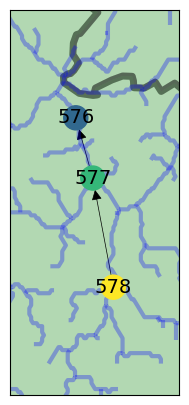

In [6]:
plot_current_state_of_graph(
    example,
    dpi=300,
    autozoom=0.15,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    node_size=300,
    save=0, #"Special",
    river_map=1,
    ger_map=1,
    width=0.5,
    arrowsize=15.5,
    fs=(5, 5),
    font_size=14,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    hardcode_colors = list(base_c)[1:],
    river_width=3,
    title=None

)

In [7]:
# Run some standard preprocessing steps
sample_data = preprocess_data(
    data,
    resolution="24h",
    interpolate=False,
    normalize=False,
)

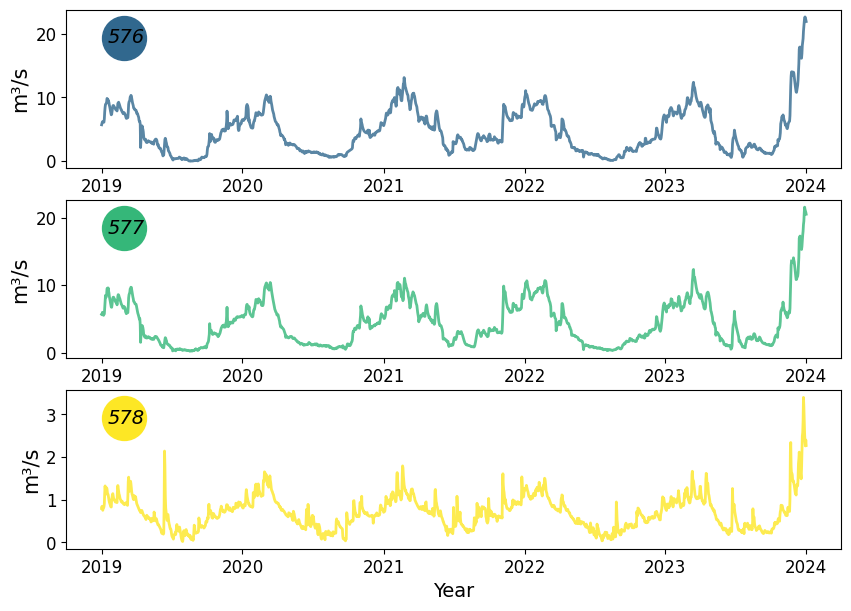

In [8]:
fancy_plot(sample_data, base_c)